In [ ]:
import hashlib
import random

# Hash function for simplicity
def H(msg):
    return hashlib.sha256(msg.encode()).hexdigest()

# Merkel Tree implementation
def build_merkel_tree(msgs):
    nodes = [H(f'{msg[0]}|{msg[1]}') for msg in msgs]
    layers = [nodes]
    while len(nodes) > 1:
        next_layer = []
        for i in range(0, len(nodes), 2):
            left = nodes[i]
            right = nodes[i+1] if i+1 < len(nodes) else nodes[i]
            combined = H(left + right)
            next_layer.append(combined)
        layers.append(next_layer)
        nodes = next_layer
    return layers[-1][0]  # Merkel root

# Simulation Parameters
n = 10             # number of nodes
m = 100            # total messages
alpha = 0.1        # proof request probability
beta = 0.05        # hub attack probability

# Simulate Messages
def simulate():
    messages = [(f'msg{i}', i) for i in range(1, m+1)]
    attacked_messages = set()

    # Hub attacks messages
    for i in range(m):
        if random.random() < beta:
            attacked_messages.add(i)

    detection = False

    # Clients periodically request proofs
    for i in range(m):
        if random.random() < alpha:
            original_root = build_merkel_tree(messages[:i+1])

            # Hub sends potentially manipulated messages
            manipulated_messages = messages[:i+1].copy()
            if any(j <= i for j in attacked_messages):
                # Simulate manipulation by hub (e.g., reorder)
                random.shuffle(manipulated_messages)

            distributed_root = build_merkel_tree(manipulated_messages)

            # Clients verify proofs
            if original_root != distributed_root:
                detection = True
                print(f'Malicious hub detected at message {i+1}')
                break

    if not detection:
        print('No attack detected')

# Run multiple trials
if __name__ == '__main__':
    trials = 1000
    detected = 0
    for _ in range(trials):
        messages = [(f'msg{i}', i) for i in range(1, m+1)]
        attacked_messages = set()
        for i in range(m):
            if random.random() < beta:
                attacked_messages.add(i)

        detection = False

        for i in range(m):
            if random.random() < alpha:
                original_root = build_merkel_tree(messages[:i+1])

                manipulated_messages = messages[:i+1].copy()
                if any(j <= i for j in attacked_messages):
                    random.shuffle(manipulated_messages)

                distributed_root = build_merkel_tree(manipulated_messages)

                if original_root != distributed_root:
                    detection = True
                    detected += 1
                    break

    detection_probability = detected / trials
    print(f'Detection Probability over {trials} trials: {detection_probability}')


Detection Probability over 1000 trials: 0.991


In [ ]:
import hashlib
import random

# Hash function for simplicity
def H(msg):
    return hashlib.sha256(msg.encode()).hexdigest()

# Merkel Tree implementation
def build_merkel_tree(msgs):
    nodes = [H(f'{msg[0]}|{msg[1]}') for msg in msgs]
    layers = [nodes]
    while len(nodes) > 1:
        next_layer = []
        for i in range(0, len(nodes), 2):
            left = nodes[i]
            right = nodes[i+1] if i+1 < len(nodes) else nodes[i]
            combined = H(left + right)
            next_layer.append(combined)
        layers.append(next_layer)
        nodes = next_layer
    return layers[-1][0]  # Merkel root

# Simulation Parameters
n = 10             # number of nodes
m = 100            # total messages
alpha = 0.1        # proof request probability
beta = 0.05        # hub attack probability

# Run multiple trials and compute average first attacked message
if __name__ == '__main__':
    trials = 1000
    detected = 0
    first_attack_positions = []

    for _ in range(trials):
        messages = [(f'msg{i}', i) for i in range(1, m+1)]
        attacked_messages = []
        first_attack_pos = None

        for i in range(m):
            if random.random() < beta:
                attacked_messages.append(i)
                if first_attack_pos is None:
                    first_attack_pos = i + 1

        if first_attack_pos is not None:
            first_attack_positions.append(first_attack_pos)

        detection = False

        for i in range(m):
            if random.random() < alpha:
                original_root = build_merkel_tree(messages[:i+1])

                manipulated_messages = messages[:i+1].copy()
                if any(j <= i for j in attacked_messages):
                    random.shuffle(manipulated_messages)

                distributed_root = build_merkel_tree(manipulated_messages)

                if original_root != distributed_root:
                    detection = True
                    detected += 1
                    break

    detection_probability = detected / trials
    avg_first_attack_pos = sum(first_attack_positions) / len(first_attack_positions) if first_attack_positions else None

    print(f'Detection Probability over {trials} trials: {detection_probability}')
    if avg_first_attack_pos:
        print(f'Average position of first attacked message: {avg_first_attack_pos}')
    else:
        print('No attacks occurred.')

Detection Probability over 1000 trials: 0.992
Average position of first attacked message: 18.956740442655935


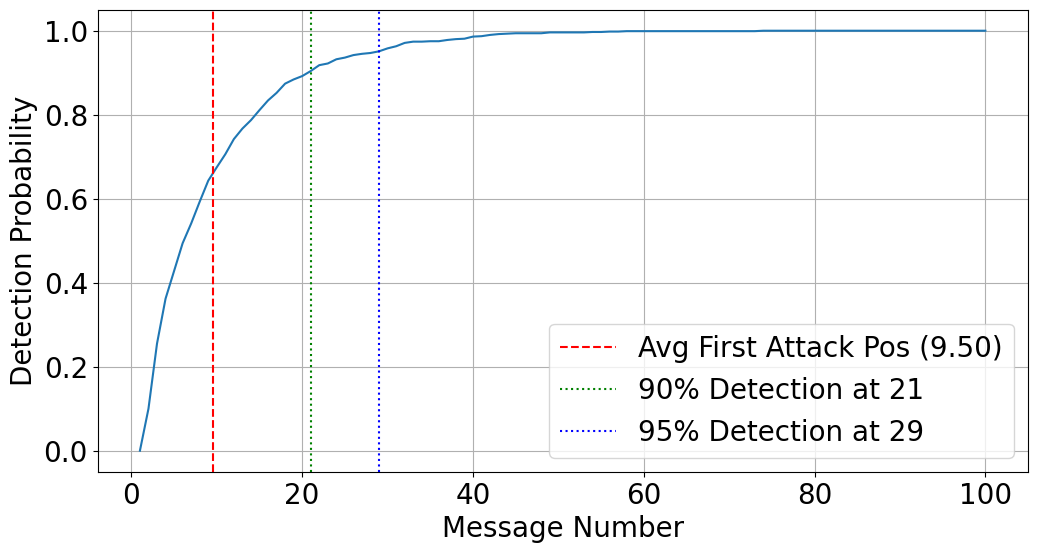

Average position of first attacked message: 9.50
90% detection reached by message: 21
95% detection reached by message: 29


In [ ]:
import hashlib
import random
import matplotlib.pyplot as plt


import seaborn as sns
from matplotlib import rc
font = {
    'size'   : 20
}
rc('font', **font)
# Hash function for simplicity
def H(msg):
    return hashlib.sha256(msg.encode()).hexdigest()

# Merkel Tree implementation
def build_merkel_tree(msgs):
    nodes = [H(f'{msg[0]}|{msg[1]}') for msg in msgs]
    while len(nodes) > 1:
        next_layer = []
        for i in range(0, len(nodes), 2):
            left = nodes[i]
            right = nodes[i+1] if i+1 < len(nodes) else nodes[i]
            next_layer.append(H(left + right))
        nodes = next_layer
    return nodes[0]

# Simulation Parameters
n = 100            # number of nodes
m = 100            # total messages
alpha = 0.05        # proof request probability
beta = 0.1        # hub attack probability

if __name__ == '__main__':
    trials = 1000
    detection_counts = [0] * m
    first_attack_positions = []

    for _ in range(trials):
        messages = [(f'msg{i}', i) for i in range(1, m+1)]
        attacked_messages = []
        first_attack_pos = None

        # Determine attacked messages and first attack position
        for i in range(m):
            if random.random() < beta:
                attacked_messages.append(i)
                if first_attack_pos is None:
                    first_attack_pos = i + 1
        if first_attack_pos is not None:
            first_attack_positions.append(first_attack_pos)

        # Simulate detection
        for i in range(m):
            if any(random.random() < alpha for _ in range(n)):
                original_root = build_merkel_tree(messages[:i+1])
                manipulated = messages[:i+1].copy()
                if any(j <= i for j in attacked_messages):
                    random.shuffle(manipulated)
                distributed_root = build_merkel_tree(manipulated)
                if original_root != distributed_root:
                    detection_counts[i] += 1
                    break

    # Compute cumulative detection probabilities
    cumulative_prob = []
    cumulative = 0
    for count in detection_counts:
        cumulative += count
        cumulative_prob.append(cumulative / trials)

    # Compute average first attack position
    avg_first_attack_pos = (sum(first_attack_positions) / len(first_attack_positions)
                            if first_attack_positions else None)

    # Find message indices where cumulative detection crosses thresholds
    x90 = next((i+1 for i, p in enumerate(cumulative_prob) if p >= 0.90), None)
    x95 = next((i+1 for i, p in enumerate(cumulative_prob) if p >= 0.95), None)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=list(range(1, m+1)), y=cumulative_prob)
    # Average first attack
    if avg_first_attack_pos:
        plt.axvline(x=avg_first_attack_pos, color='red', linestyle='--',
                    label=f'Avg First Attack Pos ({avg_first_attack_pos:.2f})')
    # 90% and 95% detection thresholds - vertical lines
    if x90:
        plt.axvline(x=x90, color='green', linestyle=':',
                    label=f'90% Detection at {x90}')
    if x95:
        plt.axvline(x=x95, color='blue', linestyle=':',
                    label=f'95% Detection at {x95}')
    # 90% and 95% detection thresholds - horizontal lines
    # plt.axhline(y=0.90, color='green', linestyle=':',
    #             label='90% Threshold')
    # plt.axhline(y=0.95, color='blue', linestyle=':',
    #             label='95% Threshold')

    plt.xlabel('Message Number')
    plt.ylabel('Detection Probability')
    #plt.title(f'Detection Probability vs Number of Messages (α = {alpha} ,β = {beta}, n = {n})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print summary
    if avg_first_attack_pos:
        print(f'Average position of first attacked message: {avg_first_attack_pos:.2f}')
    else:
        print('No attacks occurred.')
    if x90:
        print(f'90% detection reached by message: {x90}')
    if x95:
        print(f'95% detection reached by message: {x95}')


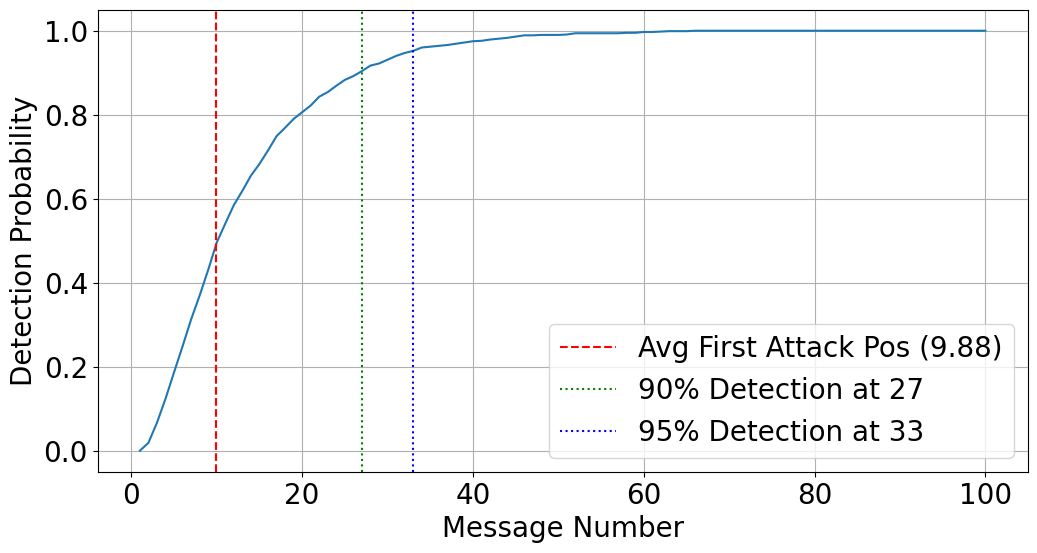

Average position of first attacked message: 9.88
90% detection reached by message: 27
95% detection reached by message: 33


In [ ]:
import hashlib
import random
import matplotlib.pyplot as plt


import seaborn as sns
from matplotlib import rc
font = {
    'size'   : 20
}
rc('font', **font)
# Hash function for simplicity
def H(msg):
    return hashlib.sha256(msg.encode()).hexdigest()

# Merkel Tree implementation
def build_merkel_tree(msgs):
    nodes = [H(f'{msg[0]}|{msg[1]}') for msg in msgs]
    while len(nodes) > 1:
        next_layer = []
        for i in range(0, len(nodes), 2):
            left = nodes[i]
            right = nodes[i+1] if i+1 < len(nodes) else nodes[i]
            next_layer.append(H(left + right))
        nodes = next_layer
    return nodes[0]

# Simulation Parameters
n = 5            # number of nodes
m = 100            # total messages
alpha = 0.05        # proof request probability
beta = 0.1        # hub attack probability

if __name__ == '__main__':
    trials = 1000
    detection_counts = [0] * m
    first_attack_positions = []

    for _ in range(trials):
        messages = [(f'msg{i}', i) for i in range(1, m+1)]
        attacked_messages = []
        first_attack_pos = None

        # Determine attacked messages and first attack position
        for i in range(m):
            if random.random() < beta:
                attacked_messages.append(i)
                if first_attack_pos is None:
                    first_attack_pos = i + 1
        if first_attack_pos is not None:
            first_attack_positions.append(first_attack_pos)

        # Simulate detection
        for i in range(m):
            if any(random.random() < alpha for _ in range(n)):
                original_root = build_merkel_tree(messages[:i+1])
                manipulated = messages[:i+1].copy()
                if any(j <= i for j in attacked_messages):
                    random.shuffle(manipulated)
                distributed_root = build_merkel_tree(manipulated)
                if original_root != distributed_root:
                    detection_counts[i] += 1
                    break

    # Compute cumulative detection probabilities
    cumulative_prob = []
    cumulative = 0
    for count in detection_counts:
        cumulative += count
        cumulative_prob.append(cumulative / trials)

    # Compute average first attack position
    avg_first_attack_pos = (sum(first_attack_positions) / len(first_attack_positions)
                            if first_attack_positions else None)

    # Find message indices where cumulative detection crosses thresholds
    x90 = next((i+1 for i, p in enumerate(cumulative_prob) if p >= 0.90), None)
    x95 = next((i+1 for i, p in enumerate(cumulative_prob) if p >= 0.95), None)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=list(range(1, m+1)), y=cumulative_prob)
    # Average first attack
    if avg_first_attack_pos:
        plt.axvline(x=avg_first_attack_pos, color='red', linestyle='--',
                    label=f'Avg First Attack Pos ({avg_first_attack_pos:.2f})')
    # 90% and 95% detection thresholds - vertical lines
    if x90:
        plt.axvline(x=x90, color='green', linestyle=':',
                    label=f'90% Detection at {x90}')
    if x95:
        plt.axvline(x=x95, color='blue', linestyle=':',
                    label=f'95% Detection at {x95}')
    # 90% and 95% detection thresholds - horizontal lines
    # plt.axhline(y=0.90, color='green', linestyle=':',
    #             label='90% Threshold')
    # plt.axhline(y=0.95, color='blue', linestyle=':',
    #             label='95% Threshold')

    plt.xlabel('Message Number')
    plt.ylabel('Detection Probability')
    #plt.title(f'Detection Probability vs Number of Messages (α = {alpha} ,β = {beta}, n = {n})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print summary
    if avg_first_attack_pos:
        print(f'Average position of first attacked message: {avg_first_attack_pos:.2f}')
    else:
        print('No attacks occurred.')
    if x90:
        print(f'90% detection reached by message: {x90}')
    if x95:
        print(f'95% detection reached by message: {x95}')


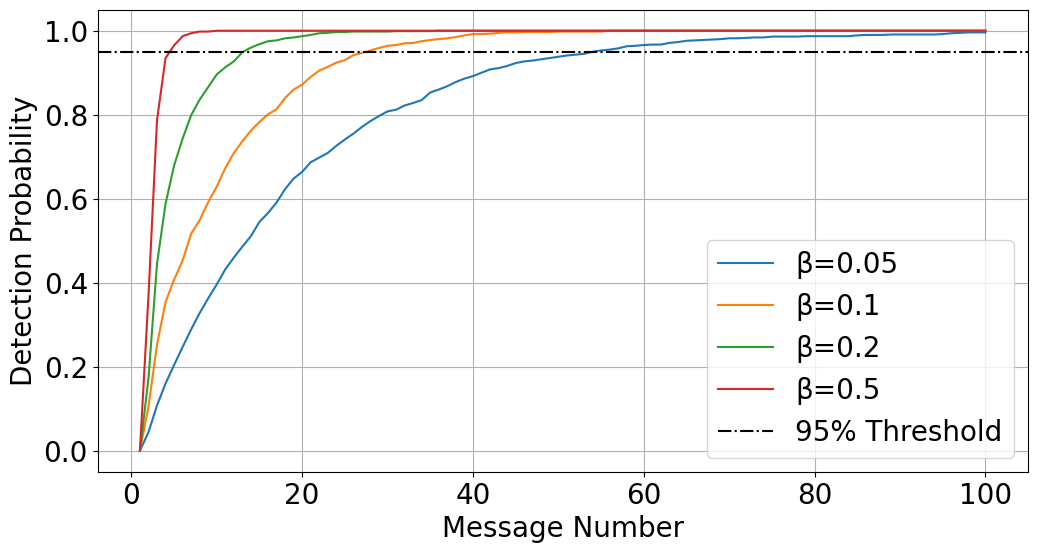

In [ ]:
import hashlib
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
font = {
    'size'   : 20
}
rc('font', **font)
# Hash function for simplicity
def H(msg):
    return hashlib.sha256(msg.encode()).hexdigest()

# Merkel Tree implementation
def build_merkel_tree(msgs):
    nodes = [H(f'{msg[0]}|{msg[1]}') for msg in msgs]
    while len(nodes) > 1:
        next_layer = []
        for i in range(0, len(nodes), 2):
            left = nodes[i]
            right = nodes[i+1] if i+1 < len(nodes) else nodes[i]
            next_layer.append(H(left + right))
        nodes = next_layer
    return nodes[0]

# Simulation Parameters
n = 100             # number of nodes
m = 100            # total messages
alpha = 0.05        # each client proof request probability per message
betas = [ 0.05, 0.1, 0.2, 0.5]  # different hub attack probabilities to compare
trials = 1000

# Prepare plot
plt.figure(figsize=(12, 6))

for beta in betas:
    detection_counts = [0] * m

    for _ in range(trials):
        messages = [(f'msg{i}', i) for i in range(1, m+1)]
        attacked = []
        # Determine attacked messages
        for i in range(m):
            if random.random() < beta:
                attacked.append(i)

        # Simulate detection per message index
        for i in range(m):
            # Each of n clients may request a proof independently
            if any(random.random() < alpha for _ in range(n)):
                original_root = build_merkel_tree(messages[:i+1])
                manipulated = messages[:i+1].copy()
                if any(j <= i for j in attacked):
                    random.shuffle(manipulated)
                distributed_root = build_merkel_tree(manipulated)
                if original_root != distributed_root:
                    detection_counts[i] += 1
                    break

    # Compute cumulative detection probabilities
    cum_prob = []
    cum = 0
    for count in detection_counts:
        cum += count
        cum_prob.append(cum / trials)

    # Plot for this beta
    sns.lineplot(x=list(range(1, m+1)), y=cum_prob, label=f'β={beta}')

# Add threshold lines
# plt.axhline(y=0.90, color='gray', linestyle='--', label='90% Threshold')
plt.axhline(y=0.95, color='black', linestyle='-.', label='95% Threshold')

plt.xlabel('Message Number')
plt.ylabel('Detection Probability')
#plt.title(f'Detection Probability vs Number of Messages (α = {alpha} , n = {n})')
plt.legend()
plt.grid(True)
plt.show()


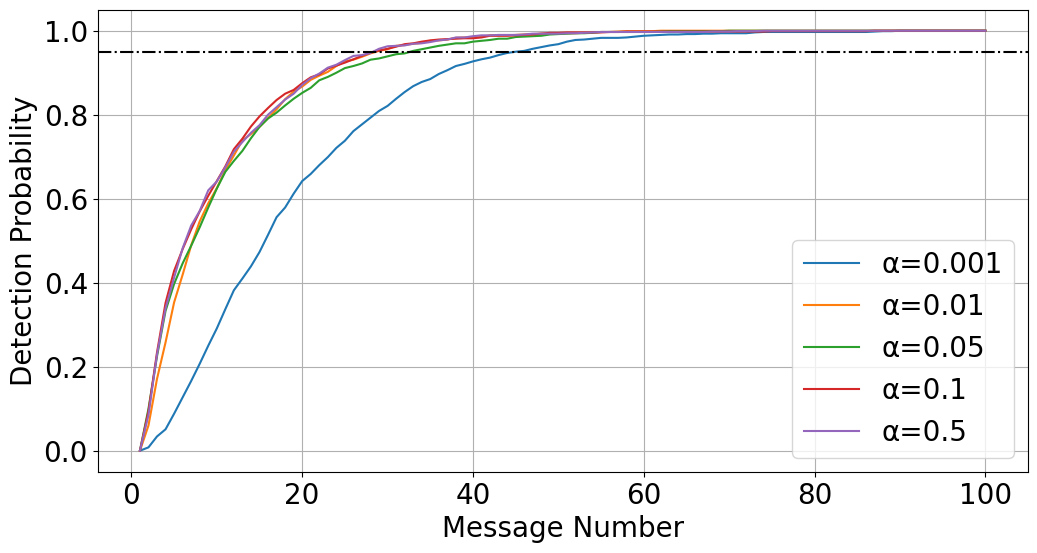

Optimum alpha for fastest 90% detection: 0.01 (message 23)
Metrics per alpha:
α=0.001: x90=37, x95=45, AUC=0.817, final_prob=1.000
α=0.01: x90=23, x95=29, AUC=0.902, final_prob=1.000
α=0.05: x90=24, x95=33, AUC=0.899, final_prob=1.000
α=0.1: x90=23, x95=29, AUC=0.907, final_prob=1.000
α=0.5: x90=23, x95=29, AUC=0.906, final_prob=1.000


In [ ]:
import hashlib
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
font = {
    'size'   : 20
}
rc('font', **font)
# Hash function for simplicity
def H(msg):
    return hashlib.sha256(msg.encode()).hexdigest()

# Merkel Tree implementation
def build_merkel_tree(msgs):
    nodes = [H(f'{msg[0]}|{msg[1]}') for msg in msgs]
    while len(nodes) > 1:
        next_layer = []
        for i in range(0, len(nodes), 2):
            left = nodes[i]
            right = nodes[i+1] if i+1 < len(nodes) else nodes[i]
            next_layer.append(H(left + right))
        nodes = next_layer
    return nodes[0]

# Simulation Parameters
n = 100            # number of clients
m = 100            # total messages
beta = 0.1        # hub attack probability per message
alphas = [0.001, 0.01, 0.05, 0.1, 0.5]  # different client proof probabilities
target_threshold = 0.90  # define detection target
target_threshold2 = 0.95
trials = 1000

# Collect metrics
metrics = {}

# Prepare plot
plt.figure(figsize=(12, 6))

for alpha in alphas:
    detection_counts = [0] * m

    for _ in range(trials):
        messages = [(f'msg{i}', i) for i in range(1, m+1)]
        attacked = [i for i in range(m) if random.random() < beta]

        # Simulate detection per message index
        for i in range(m):
            # Any of n clients may request a proof
            if any(random.random() < alpha for _ in range(n)):
                original_root = build_merkel_tree(messages[:i+1])
                manipulated = messages[:i+1].copy()
                if any(j <= i for j in attacked):
                    random.shuffle(manipulated)
                distributed_root = build_merkel_tree(manipulated)
                if original_root != distributed_root:
                    detection_counts[i] += 1
                    break

    # Compute cumulative detection probabilities
    cum_prob = []
    cum = 0
    for count in detection_counts:
        cum += count
        cum_prob.append(cum / trials)

    # Compute metrics: threshold crossing
    x90 = next((i+1 for i, p in enumerate(cum_prob) if p >= target_threshold), None)
    x95 = next((i+1 for i, p in enumerate(cum_prob) if p >= target_threshold2), None)
    auc = sum(cum_prob) / m  # approximate area under curve
    metrics[alpha] = {'x90': x90, 'x95': x95, 'auc': auc, 'final_prob': cum_prob[-1]}

    # Plot for this alpha
    sns.lineplot(x=list(range(1, m+1)), y=cum_prob, label=f'α={alpha}')

# Add threshold lines once\plt.axhline(y=target_threshold, color='gray', linestyle='--', label=f'{int(target_threshold*100)}% Threshold')\plt.axhline(y=target_threshold2, color='black', linestyle='-.', label=f'{int(target_threshold2*100)}% Threshold')

plt.xlabel('Message Number')
plt.ylabel('Detection Probability')

#plt.title(f'Detection Probability vs Number of Messages (β = {beta} , n = {n})')
plt.legend()
plt.grid(True)
plt.axhline(y=0.95, color='black', linestyle='-.', label='95% Threshold')
plt.show()

# Determine optimum alpha by fastest 90% detection (smallest x90)
valid_alphas = {a: data for a, data in metrics.items() if data['x90'] is not None}
if valid_alphas:
    optimum_alpha = min(valid_alphas, key=lambda a: valid_alphas[a]['x90'])
    print(f"Optimum alpha for fastest {int(target_threshold*100)}% detection: {optimum_alpha} (message {valid_alphas[optimum_alpha]['x90']})")
else:
    print(f"No alpha achieves {int(target_threshold*100)}% detection within {m} messages.")

# Print full metrics
print("Metrics per alpha:")
for a, data in metrics.items():
    print(f"α={a}: x90={data['x90']}, x95={data['x95']}, AUC={data['auc']:.3f}, final_prob={data['final_prob']:.3f}")


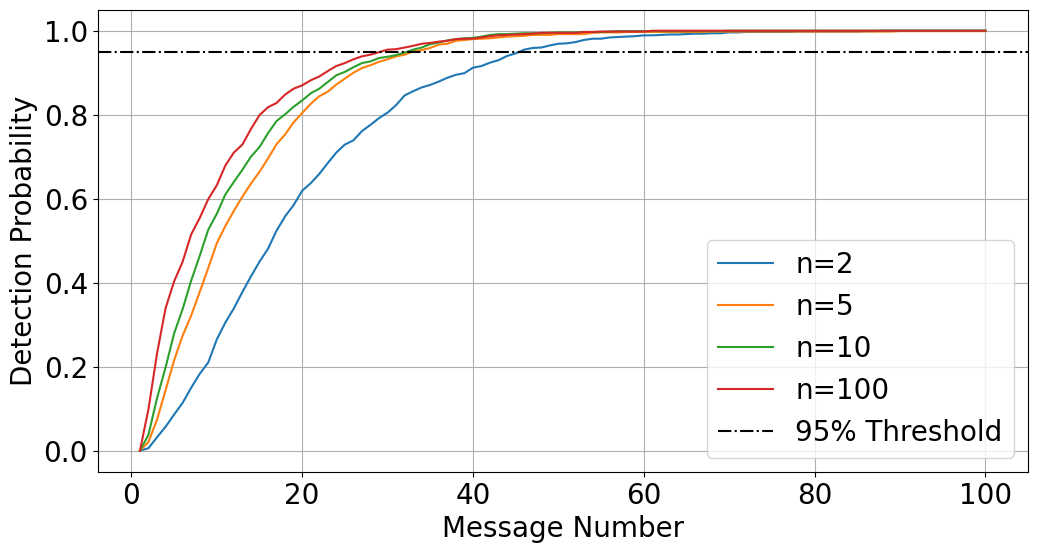

In [ ]:
import hashlib
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
font = {
    'size'   : 20
}
rc('font', **font)
# Hash function for simplicity
def H(msg):
    return hashlib.sha256(msg.encode()).hexdigest()

# Merkel Tree implementation
def build_merkel_tree(msgs):
    nodes = [H(f'{msg[0]}|{msg[1]}') for msg in msgs]
    while len(nodes) > 1:
        next_layer = []
        for i in range(0, len(nodes), 2):
            left = nodes[i]
            right = nodes[i+1] if i+1 < len(nodes) else nodes[i]
            next_layer.append(H(left + right))
        nodes = next_layer
    return nodes[0]

# Simulation Parameters
client_counts = [2, 5, 10, 100]  # different numbers of clients
m = 100            # total messages
alpha = 0.05       # fixed client proof request probability
beta = 0.1         # hub attack probability per message
target_threshold = 0.90
target_threshold2 = 0.95
trials = 1000

# Prepare plot
plt.figure(figsize=(12, 6))

for n in client_counts:
    detection_counts = [0] * m

    for _ in range(trials):
        messages = [(f'msg{i}', i) for i in range(1, m+1)]
        attacked = [i for i in range(m) if random.random() < beta]

        for i in range(m):
            if any(random.random() < alpha for _ in range(n)):
                original_root = build_merkel_tree(messages[:i+1])
                manipulated = messages[:i+1].copy()
                if any(j <= i for j in attacked):
                    random.shuffle(manipulated)
                distributed_root = build_merkel_tree(manipulated)
                if original_root != distributed_root:
                    detection_counts[i] += 1
                    break

    cum_prob = []
    cum = 0
    for count in detection_counts:
        cum += count
        cum_prob.append(cum / trials)

    sns.lineplot(x=list(range(1, m+1)), y=cum_prob, label=f'n={n}')

# plt.axhline(y=target_threshold, color='gray', linestyle='--', label=f'{int(target_threshold*100)}% Threshold')
plt.axhline(y=target_threshold2, color='black', linestyle='-.', label=f'{int(target_threshold2*100)}% Threshold')

plt.xlabel('Message Number')
plt.ylabel('Detection Probability')
#plt.title(f'Detection Probability vs Number of Messages (α = {alpha} ,β = {beta})')
plt.legend()
plt.grid(True)
plt.show()
